In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from nba_api.stats.static.players import get_players, get_active_players
from nba_api.stats.static.teams import get_teams
from nba_api.stats.endpoints import leaguestandings, playercareerstats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)

In [3]:
#TODO make in csv and read_csv
all_teams = pd.DataFrame(get_teams())
all_players = pd.DataFrame(get_players())
active_players = pd.DataFrame(get_active_players())
# standings = leaguestandings.LeagueStandings(league_id='00', season='2022-23', season_type='Regular Season')
# standings = standings.get_data_frames()[0]
# standings.to_csv("standings.csv")

In [1]:
# results = []
# for p_id in active_players['id'].values:
#     print('start {}'.format(p_id))
#     stats_obj = playercareerstats.PlayerCareerStats(player_id=p_id)
#     stats_df = stats_obj.get_data_frames()[0]
#     results.append(stats_df)
#     print('done {}'.format(p_id))
#     sleep(1)

# df = pd.concat(results)
# df.to_csv("PlayerCareerStats.csv")

Questions:
Does the top scorers points impact the teams record?


In [4]:
standings = pd.read_csv("standings.csv",index_col=0)
player_stats = pd.read_csv("PlayerCareerStats.csv",index_col=0)
player_stats = player_stats.merge(active_players[["id","full_name"]], left_on="PLAYER_ID", right_on="id")
player_stats["PPG"] = player_stats["PTS"]/player_stats["GP"]

In [5]:
current_stats = player_stats[player_stats["SEASON_ID"]=="2022-23"]

In [6]:
results=[]
for team in all_teams["abbreviation"].values:
    team_stats = current_stats[current_stats["TEAM_ABBREVIATION"] == team]
    top = team_stats.sort_values("PPG", ascending=False).iloc[0]
    results.append(top)

In [42]:
top_players = pd.concat(results, axis = 1).T.set_index("TEAM_ID")

E:\conda\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [76]:
X = top_players[["PPG"]].sort_index()
y = standings.set_index("TeamID")["WINS"].sort_index()

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.2830503733750729

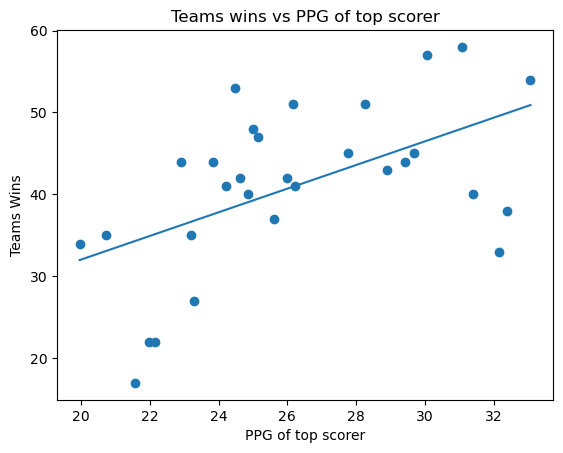

In [77]:
x_line = np.linspace(X["PPG"].min(),X["PPG"].max(),500)
#y_line = model.predict(x_line.reshape(-1,1))

plt.scatter(X["PPG"],y)
plt.xlabel("PPG of top scorer")
plt.ylabel("Teams Wins")
plt.title("Teams wins vs PPG of top scorer")
plt.plot(x_line,model.coef_[0]*x_line+model.intercept_)

In [80]:
X2 = top_players[["PPG","FG_PCT","PLAYER_AGE"]].sort_index()
y2 = standings.set_index("TeamID")["WINS"].sort_index()

model2 = LinearRegression()
model2.fit(X2,y2)
model2.score(X2,y2)

0.42322587097243425

In [75]:
top_players

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,id,full_name,PPG
TEAM_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1610612737,1629027,2022-23,0,ATL,24.0,73,73,2541.0,597,1390,0.429,154,460,0.335,566,639,0.886,56,161,217,741,80,9,300,104,1914,1629027,Trae Young,26.219178
1610612738,1628369,2022-23,0,BOS,25.0,74,74,2732.0,727,1559,0.466,240,686,0.35,531,622,0.854,78,571,649,342,78,51,213,160,2225,1628369,Jayson Tatum,30.067568
1610612739,1628378,2022-23,0,CLE,26.0,68,68,2432.0,679,1402,0.484,245,635,0.386,319,368,0.867,63,226,289,301,99,27,180,168,1922,1628378,Donovan Mitchell,28.264706
1610612740,1629627,2022-23,0,NOP,22.0,29,29,956.0,285,469,0.608,7,19,0.368,177,248,0.714,58,144,202,133,32,16,99,65,754,1629627,Zion Williamson,26.0
1610612741,203897,2022-23,0,CHI,28.0,77,77,2768.0,673,1388,0.485,204,544,0.375,363,428,0.848,42,303,345,327,69,18,194,159,1913,203897,Zach LaVine,24.844156
1610612742,1629029,2022-23,0,DAL,24.0,66,66,2391.0,719,1449,0.496,185,541,0.342,515,694,0.742,54,515,569,529,90,33,236,166,2138,1629029,Luka Doncic,32.393939
1610612743,203999,2022-23,0,DEN,28.0,69,69,2323.0,646,1022,0.632,57,149,0.383,341,415,0.822,167,650,817,678,87,47,247,174,1690,203999,Nikola Jokic,24.492754
1610612744,201939,2022-23,0,GSW,35.0,56,56,1941.0,559,1133,0.493,273,639,0.427,257,281,0.915,39,302,341,352,52,20,179,117,1648,201939,Stephen Curry,29.428571
1610612745,1630224,2022-23,0,HOU,21.0,76,76,2602.0,566,1359,0.416,187,554,0.338,364,463,0.786,43,241,284,281,59,18,200,131,1683,1630224,Jalen Green,22.144737
